## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
## get the shape of the data frame (number of rows, number of columns)
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
## get the number of unique records in series
df['user_id'].unique().shape[0]

290584

d. The proportion of users converted.

In [5]:
## get the propertion of each category in the series and then locate what we need with the .loc[]
df['converted'].value_counts(normalize=True).loc[1]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
## filter the dataset to get the rows which has unmatches in them
## and then get the length of it.

filt = (
    ((df['group'] == 'treatment') & 
     (df['landing_page'] != 'new_page')
    ) |
    ((df['group'] == 'control') & 
     (df['landing_page'] != 'old_page')
    )
)
print(filt.value_counts().loc[True])

3893


f. Do any of the rows have missing values? **No**

In [7]:
## calcuate the count of each NaN value each column in the dataset.
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
## drop those unmateched values from the dataset.
df2 = df.drop(df[filt].index)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
## get the count of each unique user in the new dataset
df2['user_id'].unique().shape[0]

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
## check if is there is any duplicates in the dataset
duplicate_rows = df2[df2['user_id'].duplicated()]
duplicate_rows

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
## locate those duplicates found above.
df2.loc[duplicate_rows.index]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
## drop the duplicated rows found in the dataset.
df2 = df2.drop(duplicate_rows.index)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [14]:
## another check if there is any duplicates.
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
## get the proportion of each field in the column and locate who has converted.
df2['converted'].value_counts(normalize=True).loc[1]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
## filter the dataset to show only the who in the control group and then
## get the proportion of each field in the column and locate who has converted.

df2[df2['group'] == 'control']['converted'].value_counts(normalize=True).loc[1]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
## filter the dataset to show only the who in the treatment group and then
## get the proportion of each field in the column and locate who has converted.

df2[df2['group'] == 'treatment']['converted'].value_counts(normalize=True).loc[1]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
## get the proportion for recieving a page for each group member.
df2['landing_page'].value_counts(normalize=True).loc['new_page']

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

**Answer**

will from the data above we could say that: 
- a person is recieving a page is a fair process wiht p = .5
- a person in a control group has a probability of 12.04 % to convert
- a person in a treatment group has a probability of 11.88 % to convert

so a person is more likley to convert in when should the old page rather than the new page

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

$$H_0 : p_{new} \leq p_{old}$$
$$H_1 : p_{new} > p_{old}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
## create a new dataframe for each group memeber, one for control users, and one for the treatment users.
new_page_df = df2[df2['group'] == 'control']
old_page_df = df2[df2['group'] == 'treatment']

Cause it stats that the $p_{new} = p_{old} = converted$ then the $p_{new} = p_{old}$

In [20]:
p_new = df2['converted'].value_counts(normalize=True).loc[1]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br>

In [21]:
p_old = df2['converted'].value_counts(normalize=True).loc[1]
p_old

0.11959708724499628

c. What is $n_{new}$?

In [22]:
## get the length of the treatment group.
n_new = new_page_df.shape[0]
n_new

145274

d. What is $n_{old}$?

In [23]:
## get the length of the control group.
n_old = old_page_df.shape[0]
n_old

145310

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
## simulate the result in the new_df with NumPY with the same propbability and size as in the group treatment.
new_page_converted = np.random.choice([1, 0], p=[p_new, 1-p_new], size=n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
## simulate the result in the new_df with NumPY with the same propbability and size as in the group control.

old_page_converted = np.random.choice([1, 0], p=[p_old, 1-p_old], size=n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
## calculate the mean (rate of convertion) of each simulated group.
p_new_simulated = (new_page_converted).mean()
p_old_simulated = (old_page_converted).mean()

p_new_simulated - p_old_simulated

8.475546767504338e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
p_diffs = []

## simulating the above steps to make a good sampling distribution in order to get accurate results.

for _ in range(int(1e4)):
    '''
        grap a bootstraped sample from the dataframe and then calculate the
        convertion rate of each group category and then simulate the results with NumPY
        to calculate the differance between the two groups.
        and store the results into the p_diffs array.
    '''
    
    sample = df2.sample(df2.shape[0], replace=True)
    p_converted = sample['converted'].value_counts(normalize=True).loc[1]
    new_page_converted_simulated = np.random.choice([1, 0], p=[p_converted, 1-p_converted], size=n_new)
    old_page_converted_simulated = np.random.choice([1, 0], p=[p_converted, 1-p_converted], size=n_old)
    
    p_diff_simulated = (new_page_converted_simulated.mean() - old_page_converted_simulated.mean())
    p_diffs.append(p_diff_simulated)
    

p_diffs = np.array(p_diffs)
p_diffs[:4]

array([ 3.65587207e-05, -1.14804357e-03, -2.08325228e-03, -9.20410817e-04])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

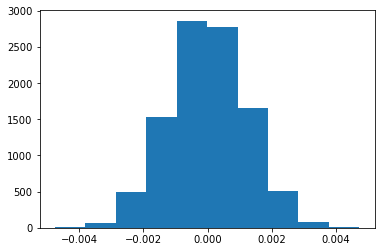

In [28]:
## plot a histogram of the sampling distribution.
plt.hist(x=p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
## calculate the actual differance in the convertion rates for each group.
actual_p_new = df[df['landing_page'] == 'new_page']['converted'].value_counts(normalize=True).loc[1]
actual_p_old = df[df['landing_page'] == 'old_page']['converted'].value_counts(normalize=True).loc[1]

actual_p_diff = actual_p_new - actual_p_old
actual_p_diff

-0.0016367945992569882

In [30]:
p_diffs_prop = (p_diffs > actual_p_diff).mean()
p_diffs_prop

0.9098

The `Z_score` for the value of `0.9098` from the `z table` is $z_{score} = 1.34$

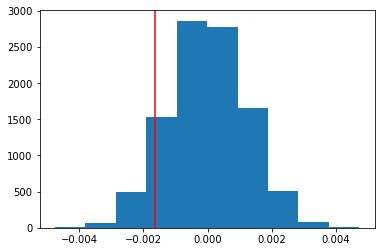

In [51]:
plt.hist(x=p_diffs);
plt.axvline(x=actual_p_diff, color='r');

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

**Answer**
> what we just calculated is the `p_value` of the **Hypothsis test** we had performed which will tell us whether to reject the **Null** or not.<br>
as if it greater than the margin or error (alpha) we have put it to be 0.05 we will fail to reject the Null, and if it less than the alpha we will reject the Null.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

In [36]:
convert_old = df2[df2['landing_page'] == 'old_page']['converted'].value_counts().loc[1]
convert_new = df2[df2['landing_page'] == 'new_page']['converted'].value_counts().loc[1]
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]

[convert_old, n_old], [convert_new, n_new]

([17489, 145274], [17264, 145310])

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [37]:
Z_score, P_value = sm.stats.proportions_ztest(
    [convert_old, convert_new],
    [n_old, n_new],
)

Z_score, P_value

(1.3109241984234394, 0.18988337448195103)

In [38]:
import scipy.stats as st

print(st.norm.cdf(Z_score))

0.9050583127590245


cause we use a margin of error $ \alpha = 0.05$ so we have $CI = 0.95$ where we can calculate the `z_score` of it from the `scipy.stats.norm.ppf`


In [39]:
st.norm.ppf(0.95)

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

**Answer**

> now as provided we have `z_score = 1.644` of the `CI` is greater than the `Z_score = 1.310` calaculated from the data.<br>
and the `p_value = 0.189` if greater than the $ \alpha = 0.05$<br>
from than we will say the we **Fail to Reject the Null Hypothsis**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

**Answer**

> couse it a binary type of regression as it consist only of `TRUE` or `FALSE` so we will use the **Logistic Regression** Method, using the `Logit` from `statesmodels`

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2.drop('control', axis=1, inplace=True)
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,treatment,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [41]:
lm = sm.Logit(df2['converted'], df2[['treatment', 'intercept']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [42]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-11-24 13:04 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
treatment    -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
==================================================================

"""

In [43]:
results.pvalues

treatment    0.189886
intercept    0.000000
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

**Answer**
$${p_{value}} = 0.119$$


$$H_0 : p_{new} = p_{old}$$
$$H_1 : p_{new} \neq p_{old}$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

**Answer**
> considering other factor is a very good idea as those factor might be statistically significant on our model than the factors we got in existing model, but those factor might have an effect as they might have **collinearity** in it which will have a bad impact on the model. or those factor might not have the weight and the model will be biased to one of them over the other as like in the **Simpson's Paradox**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [44]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,treatment,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [45]:
# get the number of each country in the dataset
df_new['country'].value_counts(normalize=True)

US    0.700723
UK    0.249381
CA    0.049896
Name: country, dtype: float64

In [46]:
### Create the necessary dummy variables
df_new[['US', 'UK']] = pd.get_dummies(df_new['country'])[['US', 'UK']]
df_new.head()

,country,timestamp,group,landing_page,converted,treatment,intercept,US,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
### Fit Your Linear Model And Obtain the Results
lm = sm.Logit(df_new['converted'], df_new[['UK', 'US']])
res = lm.fit()

Optimization terminated successfully.
         Current function value: 0.382864
         Iterations 6


In [48]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: -0.046     
Dependent Variable: converted        AIC:              222512.1606
Date:               2021-11-24 13:04 BIC:              222533.3199
No. Observations:   290584           Log-Likelihood:   -1.1125e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      1.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
UK       -1.9868     0.0114   -174.1736   0.0000   -2.0092   -1.9645
US       -1.9967     0.0068   -292.3145   0.0000   -2.0101   -1.9833
==================================================================

"""

In [49]:
1/np.exp(-1.9868), 1/np.exp(-1.9967)

(7.292161469882412, 7.364712402994374)

<a id='conclusions'></a>
## Conclusions
> from the results above. it seems that the coutntry has no effect what so ever on person will convert or not, as they both seems to have the same conf values and weight when affecting on the model.

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.